# **로지스틱 회귀분석 구현하기**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from pprint import pprint
import sys
from colorama import Style, Fore
import warnings
import time 
import datetime as dt 



warnings.filterwarnings(action = 'ignore')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [2]:
from sklearn.datasets import load_iris

In [3]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0.5, 1.0, 'Data set')

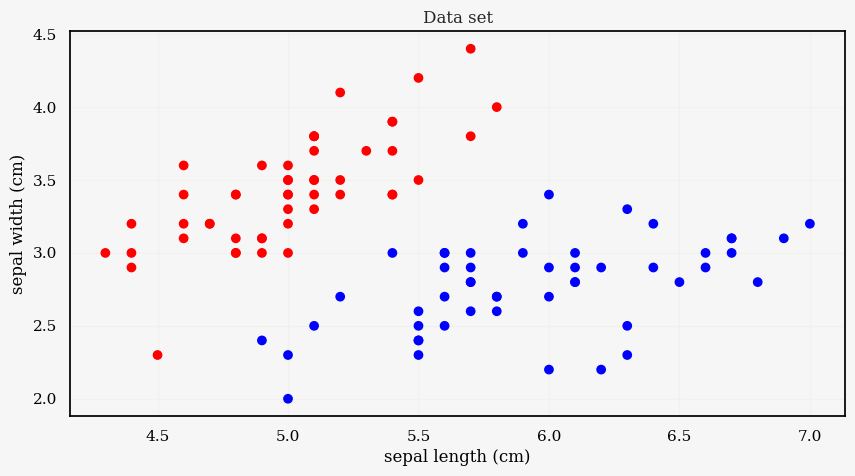

In [4]:
X = load_iris().data[:100,:2]
y = load_iris().target[:100]

cmap = ['red' if _ == 0 else 'blue' for _ in y]

fig,ax = plt.subplots(figsize = (10,5))

ax.scatter(X[:,0], X[:,1], c = cmap)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Data set')

**두 가지 입력 변수가 있는 경우의 로지스틱 회귀 분석**

In [5]:

class LogistRegression:
    
    def __init__(self, X,y):
        self.X = X
        self.y = y
        
        self.y = self.y.reshape(-1,1) # 실제값 벡터화
        
        # 초기 가중치 설정
        self.W = np.zeros((1,X.shape[1])) # 초기 가중치 
        self.b = [0]
        
        self.pred_list = []
        self.loss_list = []
        self.weight_list = []
        self.b_list = []
        
    def linear_combination(self):
        
        self.Z = self.X @ self.W.T + self.b # 선형 결합 
        
    def sigmoid(self):
        
        self.pred = 1 / (1 + np.exp(- self.Z))
        self.pred_list.append(self.pred)
        
    def loss_function(self):
        
        self.loss = np.mean(-(self.y * np.log(self.pred) + (1 - self.y) * np.log(1 - self.pred)))
        self.loss_list.append(self.loss)
        
    def back_propagation(self):
        
        self.dl_dpred = -(self. y / self.pred) + (1 - self.y) / (1 - self.pred)
        self.dpred_dz = self.pred*(1 - self.pred)
        
        self.dz_dw = self.X # weight 에 대한 미분
        self.dz_db = 1 # 절편에 대한 미분 
        
        # Loss fucntion 에 대해서 weight 와 b 에 대한 편미분값 
        self.dl_dw = self.dz_dw.T @ (self.dl_dpred * self.dpred_dz)
        self.dl_db = self.dl_dpred.T @ self.dpred_dz        
        
    def gradient_decent(self, alpha):
        
        self.W -= alpha * self.dl_dw.T
        self.b -= alpha * self.dl_db
        
        self.weight_list.append(self.W[0].copy())
        self.b_list.append(self.b[0].copy())
        
    def fit(self,iteration,alpha):
        
        for iter in range(iteration + 1):
            
            self.linear_combination()
            self.sigmoid()
            self.loss_function()
            self.back_propagation()

            if iter % 100 == 0:
                
                predict = (self.pred > 0.5).astype(int)
                
                self.accuracy = np.mean(predict == self.y)
                
                print(
                    f'iteration :{iter}' , f'Loss :{round(self.loss,2)}', f'accuracy : {self.accuracy}',f'Weight :{self.W[0]}' , f'bias :{self.b[0]}'
                , sep = '\t')
                
            self.gradient_decent(alpha = alpha)     
                

In [16]:
logist = LogistRegression(X,y)

logist.fit(iteration = 1000, alpha = 0.001)

iteration :0	Loss :0.69	accuracy : 0.5	Weight :[0. 0.]	bias :0
iteration :100	Loss :0.35	accuracy : 0.99	Weight :[ 0.92341814 -1.56315773]	bias :[-0.14368749]
iteration :200	Loss :0.24	accuracy : 0.99	Weight :[ 1.44037694 -2.44069045]	bias :[-0.24242267]
iteration :300	Loss :0.19	accuracy : 0.99	Weight :[ 1.79780113 -3.04255949]	bias :[-0.32068281]
iteration :400	Loss :0.16	accuracy : 0.99	Weight :[ 2.07202978 -3.5013389 ]	bias :[-0.38770784]
iteration :500	Loss :0.14	accuracy : 0.99	Weight :[ 2.29534526 -3.87281356]	bias :[-0.44762413]
iteration :600	Loss :0.13	accuracy : 0.99	Weight :[ 2.48426042 -4.18543243]	bias :[-0.50261595]
iteration :700	Loss :0.12	accuracy : 0.99	Weight :[ 2.64833548 -4.45562995]	bias :[-0.55397855]
iteration :800	Loss :0.11	accuracy : 0.99	Weight :[ 2.79360135 -4.69375517]	bias :[-0.60254397]
iteration :900	Loss :0.11	accuracy : 0.99	Weight :[ 2.92410892 -4.90674907]	bias :[-0.64887938]
iteration :1000	Loss :0.1	accuracy : 0.99	Weight :[ 3.04271251 -5.0994959

Text(0, 0.5, 'Loss')

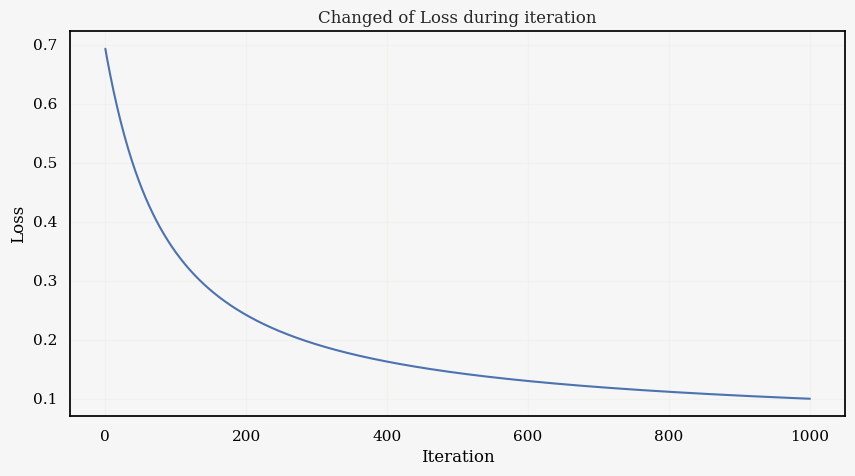

In [18]:
fig,ax = plt.subplots(figsize = (10,5))

ax.plot(logist.loss_list)
ax.set_title('Changed of Loss during iteration')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')

iteration :0	Loss :0.69	accuracy : 0.5	Weight :[0. 0.]	bias :0
iteration :100	Loss :0.69	accuracy : 0.5	Weight :[ 0.01934748 -0.018528  ]	bias :[-0.0006919]
iteration :200	Loss :0.68	accuracy : 0.5	Weight :[ 0.03441319 -0.03922798]	bias :[-0.00212938]
iteration :300	Loss :0.67	accuracy : 0.52	Weight :[ 0.0478796  -0.06059218]	bias :[-0.00382688]
iteration :400	Loss :0.67	accuracy : 0.6	Weight :[ 0.06070827 -0.08208136]	bias :[-0.00561049]
iteration :500	Loss :0.66	accuracy : 0.71	Weight :[ 0.07324455 -0.10350314]	bias :[-0.00741791]
iteration :600	Loss :0.65	accuracy : 0.82	Weight :[ 0.08561288 -0.12478952]	bias :[-0.00922686]
iteration :700	Loss :0.65	accuracy : 0.86	Weight :[ 0.0978585  -0.14591709]	bias :[-0.01102941]
iteration :800	Loss :0.64	accuracy : 0.89	Weight :[ 0.1099982  -0.16687846]	bias :[-0.01282277]
iteration :900	Loss :0.64	accuracy : 0.91	Weight :[ 0.1220386  -0.18767202]	bias :[-0.01460601]
iteration :1000	Loss :0.63	accuracy : 0.95	Weight :[ 0.13398264 -0.20829822]	

Text(0, 0.5, 'Loss')

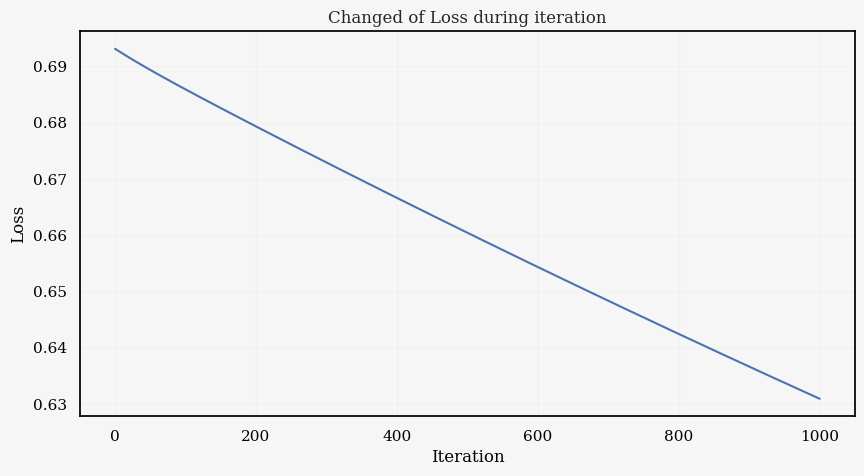

In [19]:
logist = LogistRegression(X,y)

logist.fit(iteration = 1000, alpha = 0.00001)

fig,ax = plt.subplots(figsize = (10,5))

ax.plot(logist.loss_list)
ax.set_title('Changed of Loss during iteration')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')

iteration :0	Loss :0.69	accuracy : 0.5	Weight :[0. 0.]	bias :0
iteration :100	Loss :0.05	accuracy : 0.99	Weight :[  6.03394602 -10.22336345]	bias :[-1.04677301]
iteration :200	Loss :0.05	accuracy : 0.99	Weight :[  6.14625817 -10.33329053]	bias :[-1.31730585]
iteration :300	Loss :0.05	accuracy : 0.99	Weight :[  6.25021612 -10.42996348]	bias :[-1.58364853]
iteration :400	Loss :0.05	accuracy : 0.99	Weight :[  6.34694023 -10.5152219 ]	bias :[-1.84614019]
iteration :500	Loss :0.05	accuracy : 0.99	Weight :[  6.43734808 -10.59057243]	bias :[-2.10505923]
iteration :600	Loss :0.05	accuracy : 0.99	Weight :[  6.52220124 -10.65726583]	bias :[-2.36063669]
iteration :700	Loss :0.05	accuracy : 0.99	Weight :[  6.60213923 -10.71635272]	bias :[-2.61306616]
iteration :800	Loss :0.04	accuracy : 0.99	Weight :[  6.67770454 -10.7687248 ]	bias :[-2.8625111]
iteration :900	Loss :0.04	accuracy : 0.99	Weight :[  6.74936161 -10.81514591]	bias :[-3.10911056]
iteration :1000	Loss :0.04	accuracy : 0.99	Weight :[  6.

Text(0, 0.5, 'Loss')

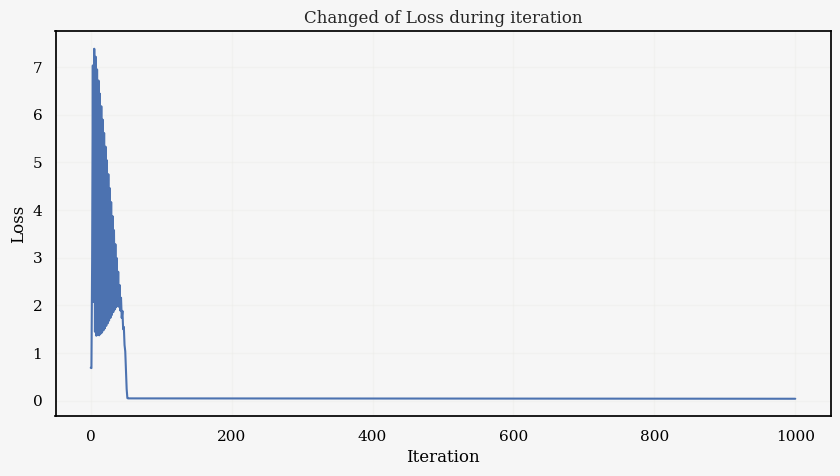

In [21]:
logist = LogistRegression(X,y)

logist.fit(iteration = 1000, alpha = 0.01)

fig,ax = plt.subplots(figsize = (10,5))

ax.plot(logist.loss_list)
ax.set_title('Changed of Loss during iteration')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')

iteration :0	Loss :0.69	accuracy : 0.5	Weight :[0. 0.]	bias :0
iteration :100	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :200	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :300	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :400	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :500	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :600	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :700	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :800	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :900	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]
iteration :1000	Loss :nan	accuracy : 0.5	Weight :[nan nan]	bias :[nan]


Text(0, 0.5, 'Loss')

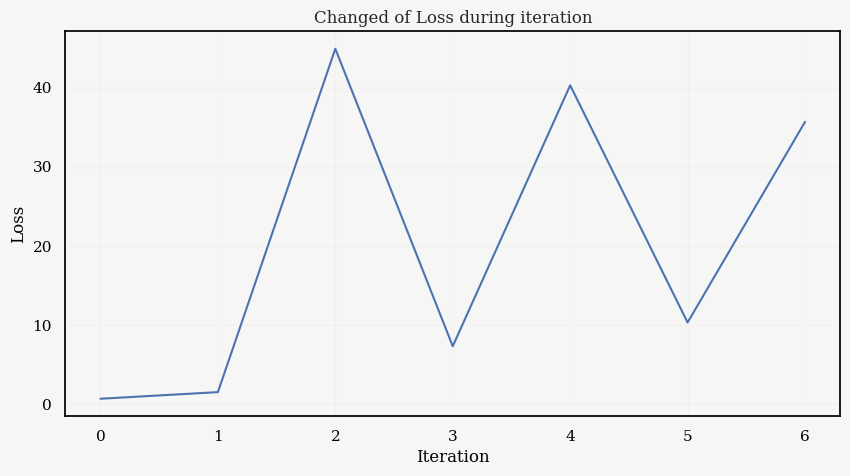

In [24]:
logist = LogistRegression(X,y)

logist.fit(iteration = 1000, alpha = 0.1)

fig,ax = plt.subplots(figsize = (10,5))

ax.plot(logist.loss_list)
ax.set_title('Changed of Loss during iteration')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')